In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import scipy as sp
from scipy import stats

# import sys
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})

In [2]:
real_df = pd.read_csv("lifeTimes_real.csv")
prediction_df = pd.read_csv("lifeTimes.csv")

In [3]:
real = []
pred = []
p_values = []
t = []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    real_life_time_error = row['error']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    p_values.append(stats.t.sf(np.abs(((real_life_time - predicted_life_time) / real_life_time_error)), row['count'] - 1) * 2)
    t.append(np.abs(((real_life_time - predicted_life_time) / real_life_time_error)))

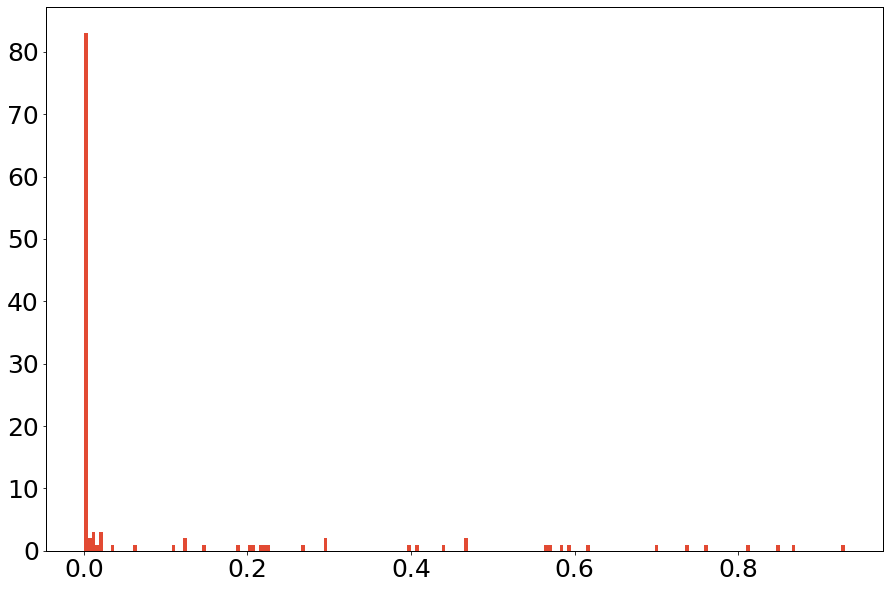

In [4]:
plt.hist(p_values, bins=200)
plt.show()

In [5]:
print(np.average(p_values))

0.1099487008013405


In [6]:
stats.t.sf(10, 999) * 2

1.6708218826871545e-22

In [7]:
error_agg = 0
error_count = 0
errors = []
real = []
pred = []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    errors.append(np.abs(real_life_time - predicted_life_time) / real_life_time)
    error_count += 1

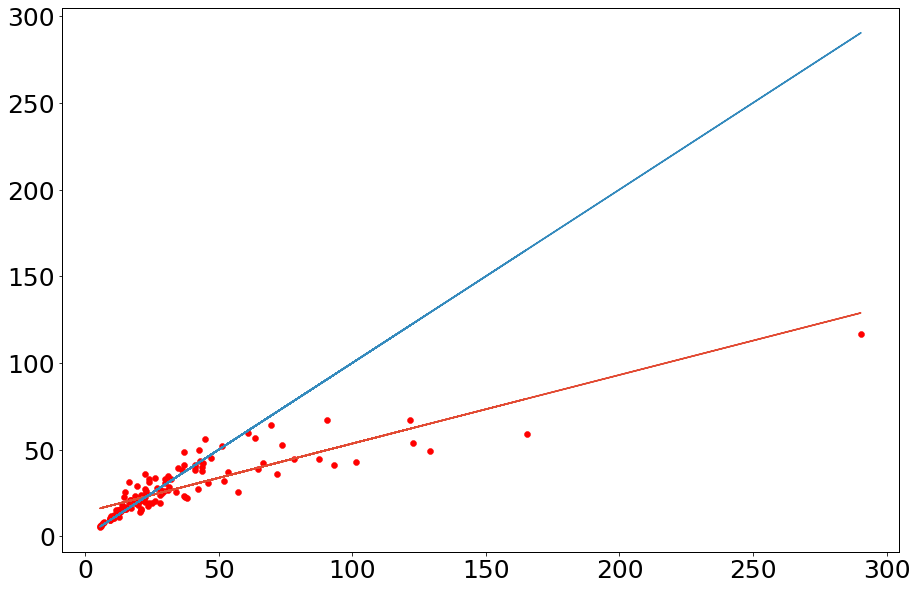

slop is  0.39574312717149684
b is  13.931721242952797


In [8]:
plt.scatter(pred, real, color='r')
# plt.errorbar(pred[:2], real[:2], yerr=real_data_errors[:2], fmt='o')
m, b = np.polyfit(np.array(pred), np.array(real), 1)
plt.plot(np.array(pred), m*np.array(pred) + b)
plt.plot(np.array(pred), 1*np.array(pred) + 0)
plt.show()
print ("slop is ", m)
print ("b is ", b)

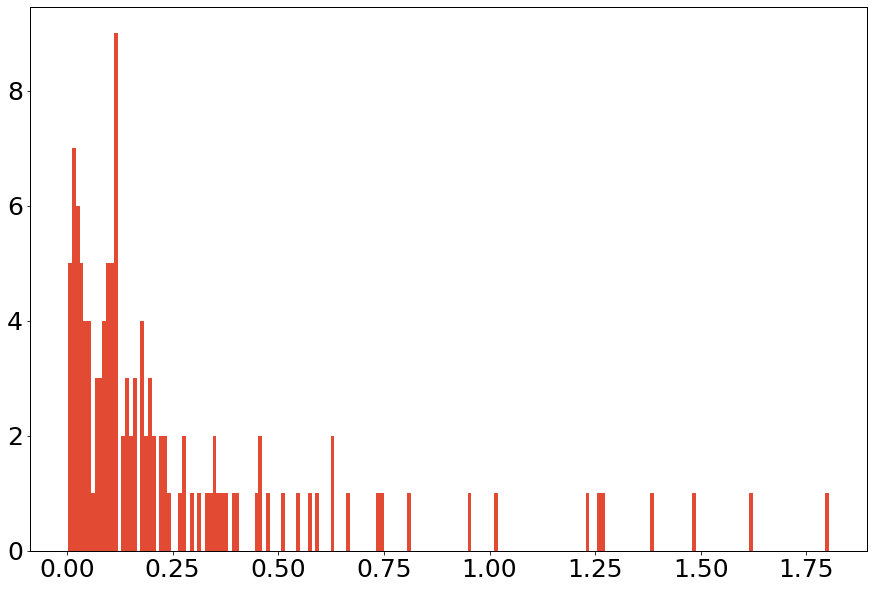

In [9]:
plt.hist(errors, bins=200)
plt.show()

In [10]:
plt.scatter(real, experiment_errors)
# plt.scatter(pred, errors, color='g')
plt.show()



NameError: name 'experiment_errors' is not defined

In [10]:
error_agg = 0
error_count = 0
errors = []
real = []
pred = []
capacities = []
channels_df = pd.read_csv("channels.csv")
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    capacities.append(channels_df.iloc[index]['capacity'])
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    errors.append(np.abs(real_life_time - predicted_life_time) / real_life_time)
    error_count += 1

In [11]:
print(error_agg / error_count)
print(error_count)
print(np.average(real))

0.2700202204831096
124
27.518098516777435


slop is  0.46914267247543795
b is  11.303311417802293


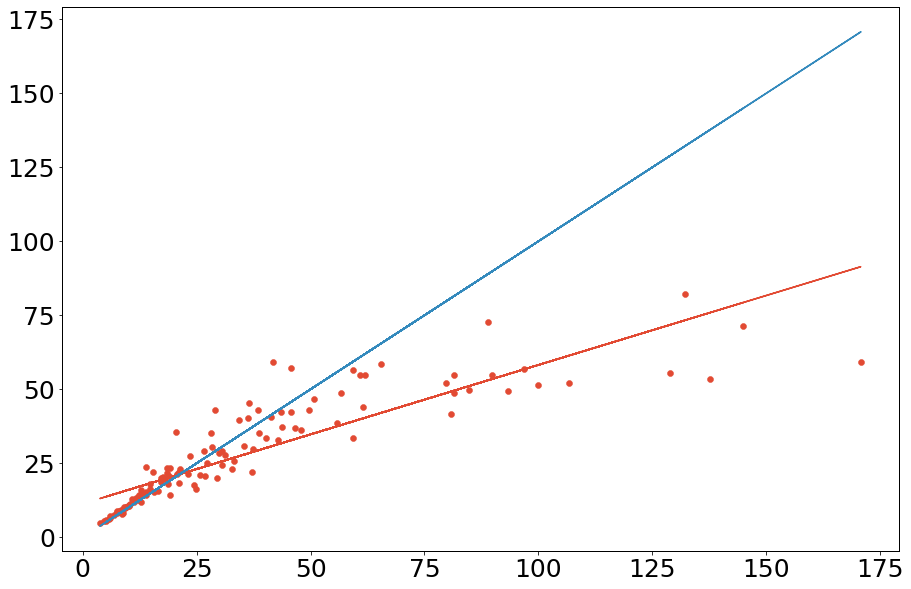

In [12]:
plt.scatter(pred, real)
m, b = np.polyfit(np.array(pred), np.array(real), 1)
plt.plot(np.array(pred), m*np.array(pred) + b)
plt.plot(np.array(pred), 1*np.array(pred) + 0)
print ("slop is ", m)
print ("b is ", b)

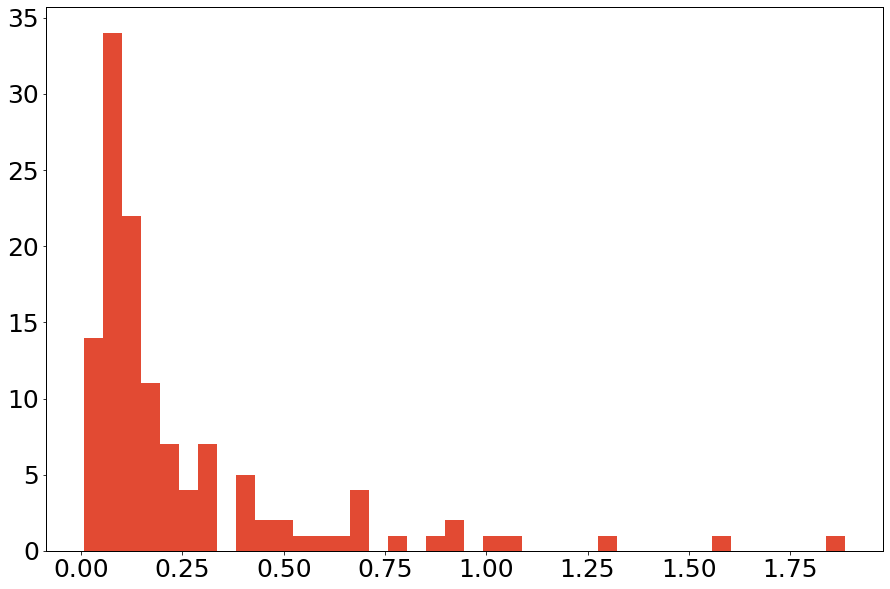

In [13]:
plt.hist(errors, bins=40)
plt.show()

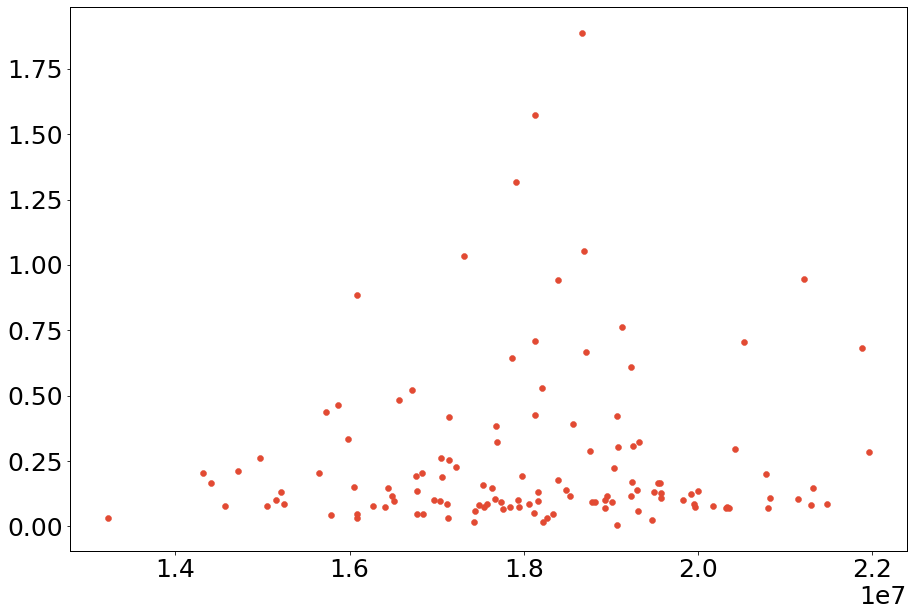

In [17]:
plt.scatter(capacities, errors)

In [28]:
channels_df = pd.read_csv("channels.csv")
Mrates = {}
file = open("Mrates.csv")
lines = file.readlines()
for i in range(len(lines)):
    line = [float(k) for k in lines[i].split(',')]
    for j in range(len(line)):
        # if line[j] != 0:
        Mrates[(i, j)] = line[j]

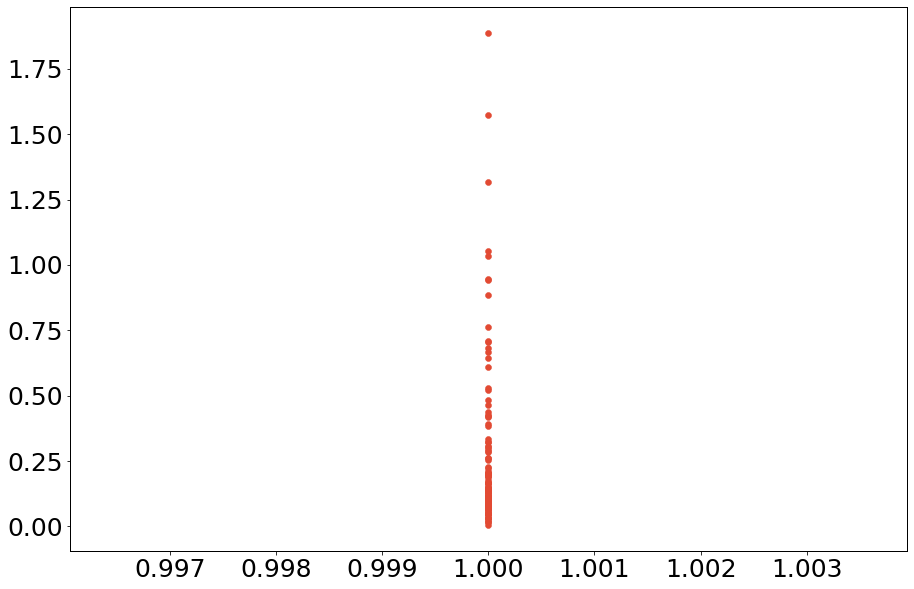

In [29]:
error_agg = 0
error_count = 0
errors = []
real = []
pred = []
Mrates_diff = []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    u = channels_df.iloc[index]['node1_id']
    v = channels_df.iloc[index]['node2_id']
    if Mrates[(u, v)] == 0 and Mrates[(v, u)] == 0 :
        Mrates_diff.append(1)
    else:
        Mrates_diff.append(abs((Mrates[(u, v)] - Mrates[(v, u)]) / (Mrates[(u, v)] + Mrates[(v, u)])))
    if real_life_time == -1:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    errors.append(np.abs(real_life_time - predicted_life_time) / real_life_time)
    error_count += 1
plt.scatter(Mrates_diff, errors)